# Problem Statement: Machine Learning 7

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored 
in the 2013-2014 season.Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:

player - name of the player

pos - the position of the player

g - number of games the player was in

gs - number of games the player started

pts - total points the player scored

There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.

In [21]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
nba = pd.read_csv("D:\\Acadgild docs\\Class room\Machine Learning\\Session 33 ML - XIII CASE STUDY (HOME)\\Assignments\\nba_2013.csv")

In [4]:
nba.shape

(481, 31)

In [5]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [6]:
nba.head().transpose()

,0,1,2,3,4
player,Quincy Acy,Steven Adams,Jeff Adrien,Arron Afflalo,Alexis Ajinca
pos,SF,C,PF,SG,C
age,23,20,27,28,25
bref_team_id,TOT,OKC,TOT,ORL,NOP
g,63,81,53,73,56
gs,0,20,12,73,30
mp,847,1197,961,2552,951
fg,66,93,143,464,136
fga,141,185,275,1011,249
fg.,0.468,0.503,0.52,0.459,0.546


In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [8]:
nba.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.000000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.000000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.000000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.000000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.000000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.000000,1688.0
fg.,479.0,0.436436,0.098672,0.0,0.400500,0.438000,0.479500,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.000000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.000000,615.0
x3p.,414.0,0.285111,0.157633,0.0,0.234355,0.330976,0.375000,1.0


In [9]:
nba.describe(include = 'O')

,player,pos,bref_team_id,season
count,481,481,481,481
unique,481,7,31,1
top,Robert Covington,SG,TOT,2013-2014
freq,1,109,63,481


In [10]:
def checknulls(df):
    nullcols = df.isnull().sum().sort_values(ascending=False)
    return nullcols[nullcols>0]

checknulls(nba)

x3p.    67
ft.     20
x2p.     3
fg.      2
efg.     2
dtype: int64

In [23]:
#Data Imputation:
#X = cancer_data[:,range(0,9)]
#Y = cancer_data[:,9]
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values="NaN", strategy='median', axis=0)
#X = imp.fit_transform(X)

#Splitting out training data into X: features and y: target
X = nba.drop(["pts"],axis=1) 
y = nba["pts"]

In [24]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [25]:
dfi  = DataFrameImputer()   # Initialize the imputer
dfi.fit(X)              # Fit the imputer

X = dfi.transform(X)

In [26]:
checknulls(X)

Series([], dtype: int64)

In [27]:
X.head().transpose()

,0,1,2,3,4
player,Quincy Acy,Steven Adams,Jeff Adrien,Arron Afflalo,Alexis Ajinca
pos,SF,C,PF,SG,C
age,23,20,27,28,25
bref_team_id,TOT,OKC,TOT,ORL,NOP
g,63,81,53,73,56
gs,0,20,12,73,30
mp,847,1197,961,2552,951
fg,66,93,143,464,136
fga,141,185,275,1011,249
fg.,0.468,0.503,0.52,0.459,0.546


In [32]:
X['pos'] =  list(pd.factorize(X['pos'])[0])

In [33]:
X['bref_team_id'] =  list(pd.factorize(X['bref_team_id'])[0])

In [35]:
X = X.drop(["player", "season", "season_end"] ,axis=1) 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [37]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm = 'auto')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  4.827586206896552 % for K-Value: 1
Accuracy is  3.4482758620689653 % for K-Value: 2
Accuracy is  4.137931034482759 % for K-Value: 3
Accuracy is  4.137931034482759 % for K-Value: 4
Accuracy is  2.0689655172413794 % for K-Value: 5
Accuracy is  2.7586206896551726 % for K-Value: 6
Accuracy is  4.137931034482759 % for K-Value: 7
Accuracy is  4.137931034482759 % for K-Value: 8
Accuracy is  4.137931034482759 % for K-Value: 9
Accuracy is  4.137931034482759 % for K-Value: 10
Accuracy is  4.137931034482759 % for K-Value: 11
Accuracy is  2.7586206896551726 % for K-Value: 12
Accuracy is  3.4482758620689653 % for K-Value: 13
Accuracy is  3.4482758620689653 % for K-Value: 14
Accuracy is  3.4482758620689653 % for K-Value: 15
Accuracy is  3.4482758620689653 % for K-Value: 16
Accuracy is  3.4482758620689653 % for K-Value: 17
Accuracy is  3.4482758620689653 % for K-Value: 18
Accuracy is  3.4482758620689653 % for K-Value: 19
Accuracy is  2.7586206896551726 % for K-Value: 20
Accuracy is  2.75

Accuracy is  4.137931034482759 % for K-Value: 3

Accuracy is  4.137931034482759 % for K-Value: 11

So K value will be 11    

# Problem Statement: Machine Learning 8

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

In [87]:
from bs4 import BeautifulSoup
import urllib.request 
import nltk

In [88]:
response = urllib.request.urlopen('http://php.net/')

In [89]:
html = response.read()

In [90]:
soup = BeautifulSoup(html,"html5lib")

In [91]:
soup  # View source of "http://php.net/"

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="https://www.php.net/index.php" rel="canonical"/>
 <link href="https://www.php.net/index" rel="shorturl"/>
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<

In [94]:
text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

In [95]:
tokens = [t for t in text.split()] 
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

In [96]:
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:87
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:7
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:3
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffe

In [97]:
vocab = len(freq.keys())
words = sum(freq.values())
lexdiv = float(words) / float(vocab)

In [99]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 475 types and 3794 tokens for a lexical diversity of 7.987


# Problem Statement: Machine Learning 9

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.

The raw image is available in spicy.misc package with the name face.

In [100]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

In [102]:
face = misc.face()

In [103]:
face.shape

(768, 1024, 3)

In [104]:
face.max()

255

In [106]:
face.dtype

dtype('uint8')

In [107]:
import matplotlib.pyplot as plt

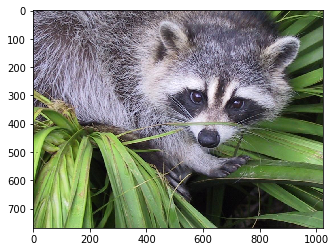

In [108]:
plt.gray()
plt.imshow(face)
plt.show()

In [109]:
rows = face.shape[0]
cols = face.shape[1]

In [114]:
from sklearn.cluster import  MiniBatchKMeans
pixels = face.reshape(face.shape[0] * face.shape[1], face.shape[2])
#kmeans = MiniBatchKMeans(n_clusters=128, n_init=10, max_iter=200)

In [116]:
kmeans = MiniBatchKMeans(n_clusters=5, n_init=10, max_iter=20)
kmeans.fit(pixels)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=20, max_no_improvement=10, n_clusters=5,
        n_init=10, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [117]:
clusters = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
labels = np.asarray(kmeans.labels_, dtype=np.uint8).reshape(rows, cols)

In [118]:
clusters

array([[ 24,  29,  18],
       [118, 121, 115],
       [184, 179, 193],
       [ 72,  83,  59],
       [154, 186, 109]], dtype=uint8)

In [119]:
labels

array([[1, 1, 2, ..., 1, 1, 1],
       [3, 1, 1, ..., 1, 1, 4],
       [3, 1, 1, ..., 1, 1, 4],
       ...,
       [3, 3, 1, ..., 1, 1, 1],
       [3, 3, 1, ..., 1, 1, 1],
       [3, 1, 1, ..., 1, 1, 1]], dtype=uint8)

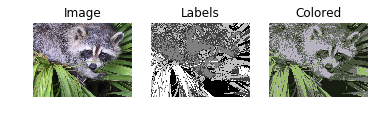

In [121]:
colored = clusters[labels]
d = {'Image': face, 'Labels': labels, 'Colored': colored}
fig, ax = plt.subplots(1, 3)

for i, name in enumerate(d):
    cmap = 'gray' if d[name].ndim == 2 else 'jet'
    ax[i].imshow(d[name], cmap=cmap)
    ax[i].axis('off')
    ax[i].set_title(name)

plt.show(fig)

# Problem Statement: Machine Learning 10

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [132]:
iris = datasets.load_iris() # Bunch object
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [133]:
A0 = iris.data # np.array
print("Dimensions:")
print(A0.shape)
print("---")
print("First 5 samples:")
print(A0[:5,:])
print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [134]:
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
X = iris.data
y = iris.target

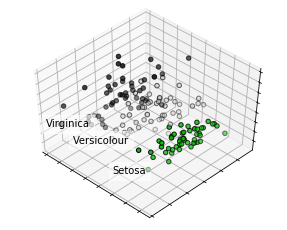

In [135]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Total running time of the script: ( 0 minutes 0.186 seconds)

# Problem Statement: Machine Learning 11

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
    
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-period#!ds =22r0&display=line

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error

In [71]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [72]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [73]:
series = read_csv('D:\\Acadgild docs\\Class room\Machine Learning\\Session 32. PROJECT 7 TIME SERIES MODELS\\Shampoo_Sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [74]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

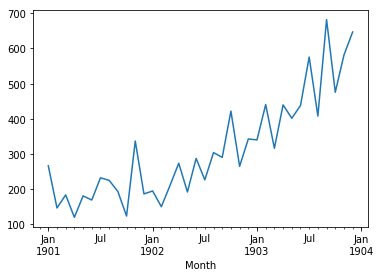

In [75]:
series.plot()
pyplot.show()

In [76]:
#Check Stationarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    pyplot.plot(timeseries, color='blue',label='Original')
    pyplot.plot(rolmean, color='red', label='Rolling Mean')
    pyplot.plot(rolstd, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

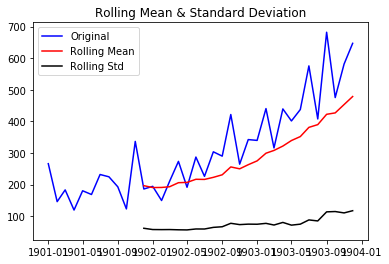

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [77]:
test_stationarity(series)
#Test Statistic                  3.060142
#Critical Value (5%)            -2.986489
# Test Statistic > Critical Value (5%) , It is not  statenary

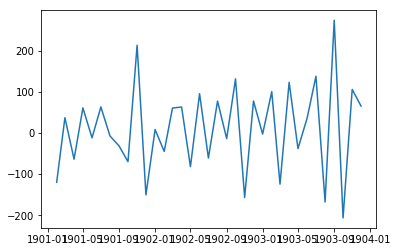

In [78]:
series_diff = series.diff(periods=1)    # periods=1 -- differetiate once
pyplot.plot(series_diff)

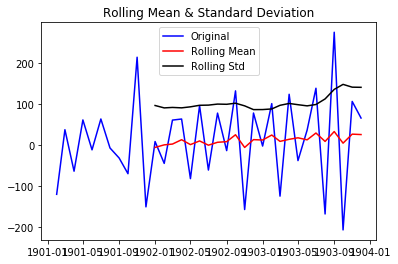

Results of Dickey-Fuller Test:
Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


In [79]:
series_diff.dropna(inplace=True)    # remove NAN values
test_stationarity(series_diff)
#Test Statistic                  -7.249074e+00
#Critical Value (5%)            -2.954127e+00
# Test Statistic < Critical Value (5%) , It is statenary

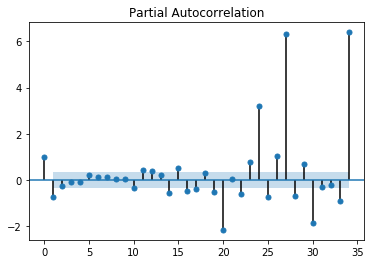

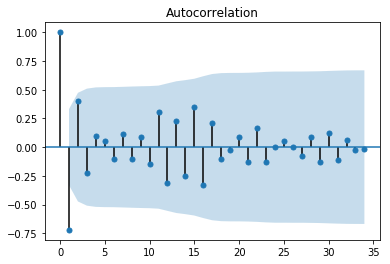

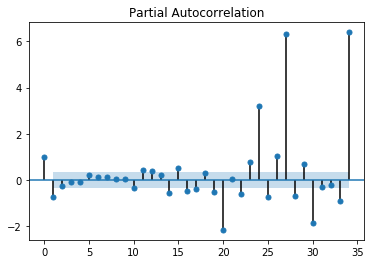

In [80]:
plot_acf(series_diff)    # q = 1  , start with 1, not zero
plot_pacf(series_diff)   # p = 1  , start with 1, not zero

In [81]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]     # create train and test
history = [x for x in train]                # train data
predictions = list()                        # test data

In [82]:
for t in range(len(test)):                   # using test 
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=307.508755, expected=342.300000
predicted=301.813955, expected=339.700000
predicted=316.960437, expected=440.400000
predicted=321.902549, expected=315.900000
predicted=359.566226, expected=439.300000


C:\Users\Sanjana\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sanjana\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=371.274809, expected=401.300000
predicted=410.774998, expected=437.400000
predicted=417.838754, expected=575.500000
predicted=441.257844, expected=407.600000
predicted=512.882422, expected=682.000000
predicted=462.954398, expected=475.300000
predicted=617.188451, expected=581.300000
predicted=551.350196, expected=646.900000


In [83]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 7003.681


In [84]:
predictions

[array([307.50875499]),
 array([301.81395539]),
 array([316.96043677]),
 array([321.90254935]),
 array([359.56622595]),
 array([371.27480945]),
 array([410.7749984]),
 array([417.83875439]),
 array([441.25784401]),
 array([512.88242207]),
 array([462.95439809]),
 array([617.1884509]),
 array([551.35019618])]

In [85]:
test

array([342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6,
       682. , 475.3, 581.3, 646.9])

In [ ]:
# plot
pyplot.plot(test)                       # blue line test actual values
pyplot.plot(predictions, color='red')   # red line test forecasted values
pyplot.show()